# **TalentLens: Machine Learning for Resume Analysis**

> *A comprehensive Jupyter notebook designed for HR professionals and recruitment teams. It streamlines the process of sifting through numerous job applications by employing Natural Language Processing (NLP) and machine learning algorithms. The notebook guides you through the entire workflow of resume screening, starting from data preprocessing, text normalization, feature extraction using TF-IDF vectorization, to training and evaluating multiple classification models. It boasts high-accuracy predictive modeling with a variety of algorithms, including K-Nearest Neighbors, Logistic Regression, Random Forest, SVC, and Multinomial Naive Bayes, each offering insights into the suitability of candidates for various job roles. This toolkit is an end-to-end solution aimed at enhancing recruitment efficiency and enabling data-driven decision-making in the talent acquisition process.*

# Importing Libraries & Preparation

This code snippet is designed for a notebook focused on Natural Language Processing (NLP) applied to resume screening. Here's an overview of the workflow and components involved:

1. **Library Imports**: The script begins by importing essential Python libraries for various tasks:
   - `numpy` for linear algebra, supporting vector and matrix operations which are fundamental in NLP tasks.
   - `pandas` for data manipulation and analysis, particularly useful for handling resume datasets in CSV format.
   - `matplotlib.pyplot` and `seaborn` for visualizing data, which can help in understanding distributions of classes or the effectiveness of preprocessing steps.
   - `re` for regular expression operations, crucial in text cleaning and preprocessing to remove unwanted characters or patterns from resumes.
   - Libraries like `stopwords` from `nltk.corpus`, and `TfidfVectorizer` from `sklearn.feature_extraction.text` are specifically imported for text preprocessing—removing common words that are unlikely to be useful for analysis and converting text data into a format suitable for machine learning models.
   - `LabelEncoder` from `sklearn.preprocessing`, `train_test_split` from `sklearn.model_selection`, `KNeighborsClassifier` from `sklearn.neighbors`, and `accuracy_score` from `sklearn.metrics` are used for preparing the dataset, splitting into training and test sets, classifying resumes into categories, and measuring the performance of the classification model, respectively.

2. **Data Exploration**: The code iterates over directories and files within a specified path (`/kaggle/input`), listing filenames. This is a preliminary step to identify the datasets available for processing and analysis, typically the collection of resumes to be screened.


In [1]:
# Import essential libraries
import numpy as np  # For linear algebra operations
import pandas as pd  # For data processing and reading CSV files
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced data visualization
import re  # For regular expressions operations
from nltk.corpus import stopwords  # For removing stopwords from text data
from sklearn.preprocessing import LabelEncoder  # For encoding labels
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
from sklearn.neighbors import KNeighborsClassifier  # For the KNN classifier
from sklearn.metrics import accuracy_score  # For evaluating model accuracy

import os  # For operating system dependent functionality

# Iterate through the directory to list all files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Initial Data Exploration for Resume Screening NLP Project

In this NLP project focusing on resume screening, the initial steps involve loading and exploring the dataset to gain insights into its structure and contents. Here's a detailed look at what the code accomplishes and the insights we can derive from the output:

1. **Data Loading**: The dataset, located at `/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv`, is loaded into a pandas DataFrame. This dataset is crucial for the project as it contains a collection of resumes categorized by job titles, making it ideal for training a model to automate the resume screening process.

2. **Sample Exploration**: By calling `df.sample(5)`, the code randomly selects and displays five samples from the dataset. This step is essential for understanding the variety and format of the data we're dealing with. Each entry in the dataset consists of two main components:
   - `Category`: The job category to which the resume belongs. This field is vital for the classification task, as it serves as the label for each resume.
   - `Resume`: The actual content of the resume in text format. This includes various sections commonly found in resumes, such as education details, skills, work experiences, and so on.

3. **Observations from the Output**:
   - The dataset encompasses a wide range of job categories, from `Arts` to `DevOps Engineer`, `Mechanical Engineer`, `Hadoop`, and `Operations Manager`. This diversity is beneficial for building a robust model capable of classifying resumes into multiple categories.
   - The resume texts contain a mix of structured and unstructured data, with sections like "Education Details" and "Skills" highlighted, followed by relevant information. This indicates the need for sophisticated text processing techniques to extract meaningful features from the resumes.
   - The presence of special characters (e.g., `\r\n`, `â¶`) and varied formatting across the resumes suggests that text cleaning and normalization will be crucial steps in the data preprocessing phase to ensure consistency and improve the model's performance.

4. **Purpose and Next Steps**: This code snippet sets the foundation for the NLP project by loading the dataset and providing a preliminary view of its contents. The next steps in the project would likely involve:
   - Cleaning the text data to remove special characters and unnecessary formatting.
   - Analyzing the distribution of categories to understand the balance of the dataset.
   - Extracting features from the text using techniques like TF-IDF vectorization.
   - Splitting the dataset into training and testing sets.
   - Training a classification model to predict the category of a resume based on its content.
   - Evaluating the model's performance and making adjustments as necessary.

This initial exploration is a critical phase in the project, setting the stage for the more detailed data preprocessing and modeling work that will follow.

In [2]:
df = pd.read_csv(r"data/UpdatedResumeDataSet.csv")
df.sample(5)

,Category,Resume
549,Operations Manager,IT SKILLS â¢ Well versed with MS Office and I...
723,Database,"SKILLSET Oracle DBA, MySQL, MARIADB, PostgreSQ..."
147,Web Designing,"Technical Skills Web Technologies: Angular JS,..."
344,Java Developer,TECHNICAL SKILLS Programming Languages: Java (...
371,Java Developer,Education Details \r\nJanuary 2016 B.E Informa...


In [3]:
df.shape

(962, 2)

In [4]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

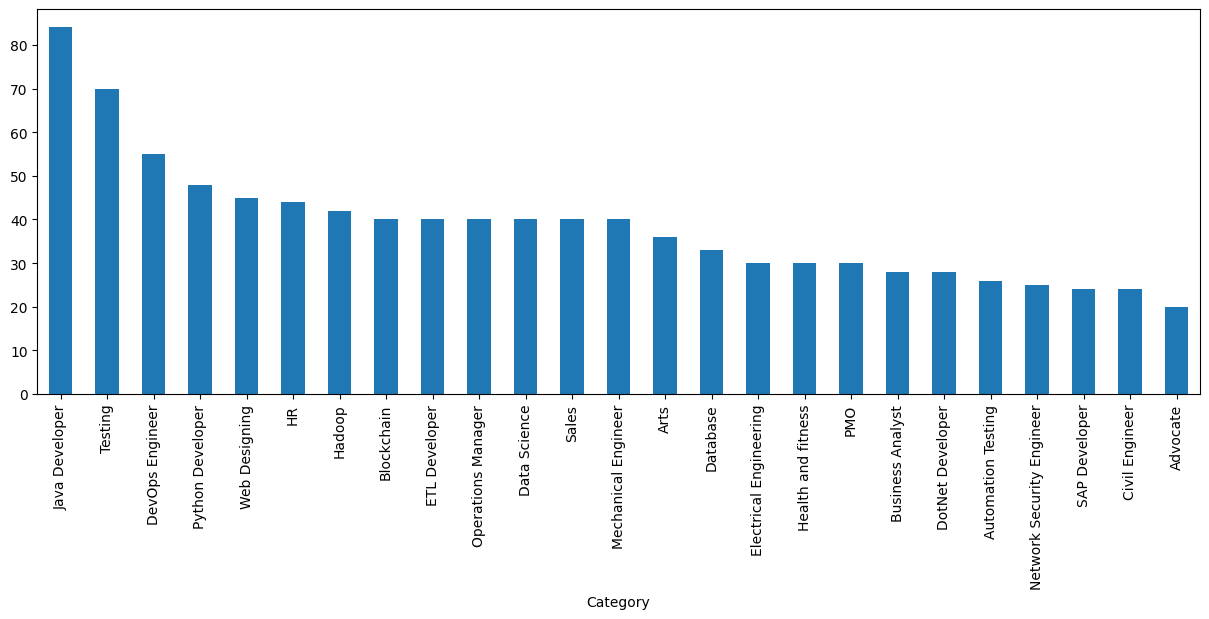

In [5]:
# Set the size of the plot
plt.figure(figsize=(15,5))

# Count the number of resumes in each category and plot a bar chart
df["Category"].value_counts().plot(kind="bar")

# Display the plot
plt.show()

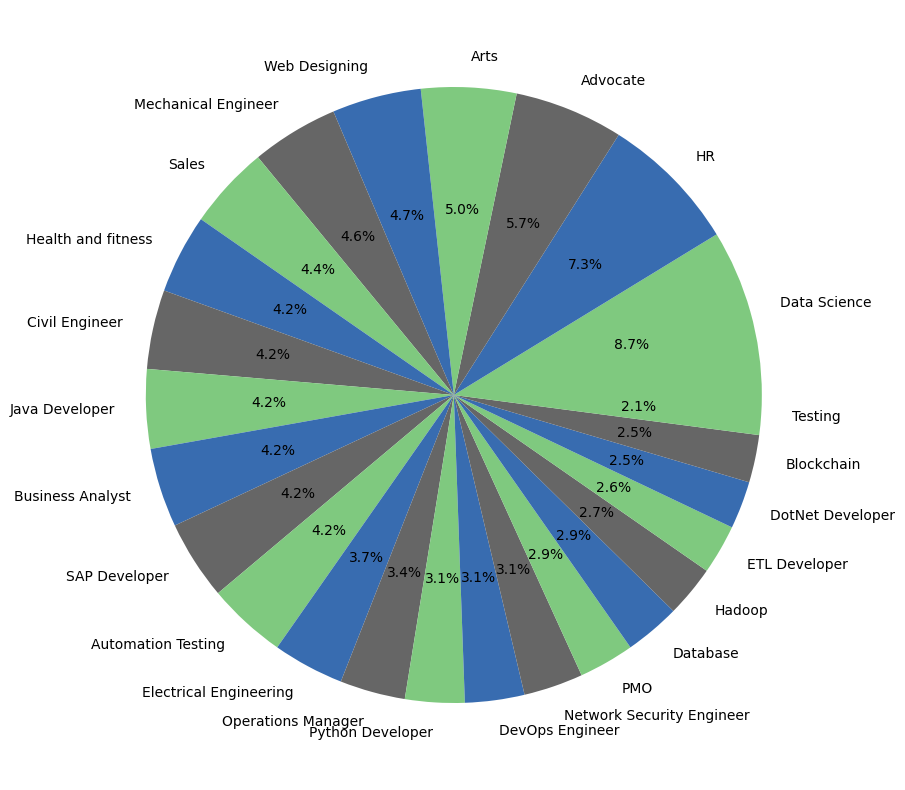

In [6]:
counts = df["Category"].value_counts()
labels = df["Category"].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=plt.cm.Accent(np.linspace(0,1,3)))
plt.show()

# Text Cleaning Function for NLP

The `clean` function is designed to preprocess a given text string by performing several cleaning steps, making it more suitable for NLP tasks such as classification, clustering, or information retrieval.

## Function Steps:

1. **Remove URLs**: The function uses a regular expression to identify and remove any URLs present in the text. This includes both `http` and `https` protocols as well as `www` domains.

2. **Remove Emails**: Another regular expression targets and eliminates email addresses. This is done by looking for patterns that match common email formats.

3. **Remove Special Characters**: The function strips out any non-alphanumeric characters (except for whitespace). This simplifies the text, leaving only letters, digits, and spaces.

4. **Remove Stop Words**: Stop words are commonly occurring words in a language that are often filtered out before processing natural language data. The function removes these stop words from the text to reduce noise and focus on more meaningful words.

## Potential Use Cases:
- Preparing data for text classification or sentiment analysis.
- Cleaning up text before feeding it into algorithms for keyword extraction.
- Standardizing text input for chatbots or search engines.

By applying this function, the text data is cleaned and standardized, which is an essential step in the preprocessing pipeline for most NLP applications.

In [7]:
def clean(text):
    """
    Clean the input text by removing URLs, emails, special characters, and stop words.
    
    :param text: The string to be cleaned
    :return: The cleaned string
    """

    # Compile patterns for URLs and emails to speed up cleaning process
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
    
    # Remove URLs
    clean_text = url_pattern.sub('', text)
    
    # Remove emails
    clean_text = email_pattern.sub('', clean_text)
    
    # Remove special characters (keeping only words and whitespace)
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    
    # Remove stop words by filtering the split words of the text
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    
    return clean_text

In [8]:
string = "Hello, $ % # I found this # article at https://www.example.com! You can contact me at john@example.com."
print(clean(string))

Hello found article contact


In [9]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [10]:
df["Resume"] = df["Resume"].apply(lambda x: clean(x))

In [11]:
df["Resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

# Encoding and Vectorization in NLP Pipeline

In the given code snippet, we are preparing the resume data for a machine learning model. This involves two crucial steps:

1. **Label Encoding**: The `Category` column in our DataFrame `df`, which contains job categories, is transformed from textual labels into a numerical format. This is necessary because most machine learning algorithms require numerical input. `LabelEncoder` from `sklearn.preprocessing` is used for this purpose.

2. **TF-IDF Vectorization**: The `Resume` column of the DataFrame, which contains the text of the resumes, is transformed into a numerical format using the Term Frequency-Inverse Document Frequency (TF-IDF) method. This is done using `TfidfVectorizer` from `sklearn.feature_extraction.text`. TF-IDF is a statistical measure used to evaluate how important a word is to a document in a collection of documents (corpus). By doing this, we convert the text data into a format that can be used by machine learning algorithms.

After these steps, the dataset will be in the correct format for training a machine learning model to classify the resumes into their respective categories.

## Workflow:

1. Fit the label encoder on the `Category` column to learn the unique categories.
2. Transform the `Category` column into encoded numerical values.
3. Fit the TF-IDF vectorizer on the `Resume` column to learn the vocabulary and IDF (Inverse Document Frequency) of the words.
4. Transform the `Resume` texts into a sparse matrix of TF-IDF features.

These steps are essential in converting raw text data into a structured, numerical format that can be efficiently used by machine learning models.

In [12]:
# Initialize the Label Encoder
le = LabelEncoder()

# Fit the label encoder on the 'Category' column to learn the unique categories
le.fit(df["Category"])

# Transform the 'Category' column into encoded numerical values
df["Category"] = le.transform(df["Category"])

In [13]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [14]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit the TF-IDF vectorizer on the 'Resume' column to learn the vocabulary and IDF of the words
tfidf.fit(df["Resume"])

# Transform the 'Resume' texts into a sparse matrix of TF-IDF features
resume = tfidf.transform(df["Resume"])

In [15]:

X_train, X_test, y_train, y_test = train_test_split(resume, df["Category"], test_size=0.2, random_state=42)

In [16]:
df["Category"].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [17]:
X_train.shape, y_train.shape

((769, 8017), (769,))

# Model Training and Evaluation with KNN Classifier

In this part of the pipeline, we are training a machine learning model and evaluating its performance.

## Steps Involved:

1. **Model Initialization**: A K-Nearest Neighbors (KNN) classifier is instantiated. KNN is a simple, instance-based learning algorithm that classifies a new instance based on the majority label of the 'k' closest training instances.

2. **Model Training**: The KNN classifier is trained using the training data (`X_train`, `y_train`), where `X_train` contains the TF-IDF features of the resumes and `y_train` contains the corresponding encoded categories.

3. **Prediction**: The trained classifier is used to predict the categories of the test data (`X_test`). The `predict` method outputs the predicted category labels for each instance in the test set.

4. **Evaluation**: The predictions are compared against the true labels (`y_test`) using the `accuracy_score` function from `sklearn.metrics`. This function calculates the accuracy of the predictions, which is the proportion of correct predictions over all predictions made.

## Result:

- The output is the accuracy score of the model, which is a measure of how well the model performs on the unseen test data. This metric is crucial for understanding the effectiveness of the model.

This process is essential for building and assessing the performance of a classification model in a supervised learning context.

In [22]:
# Initialize the KNN classifier with default parameters
clf = KNeighborsClassifier()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the categories for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# The accuracy is a float representing the proportion of correct predictions
print(f'Accuracy of the KNN classifier on test set: {accuracy:.2f}')


# 计算训练集的准确率
y_pred_train = clf.predict(X_train)

# 在训练集上进行预测
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy of the KNN classifier on training set: {accuracy_train:.2f}')

Accuracy of the KNN classifier on test set: 0.98
Accuracy of the KNN classifier on training set: 0.99


In [24]:
from sklearn.metrics import classification_report

# 打印分类报告
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87        17
           1       1.00      1.00      1.00        30
           2       0.95      0.90      0.93        21
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        15
           6       0.94      0.94      0.94        35
           7       1.00      1.00      1.00        25
           8       1.00      0.93      0.96        41
           9       0.96      1.00      0.98        23
          10       1.00      1.00      1.00        33
          11       0.92      1.00      0.96        24
          12       0.94      1.00      0.97        32
          13       1.00      1.00      1.00        38
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        69
          16       1.00      1.00      1.00        32
          17       1.00    

# Training and Evaluating Multiple Machine Learning Models

In order to build a robust NLP-based resume classification system, it's beneficial to train and compare the performance of multiple machine learning models. This approach allows us to select the best model based on performance metrics such as accuracy.

## Models Considered:

1. **K-Nearest Neighbors (KNN) Classifier**: Already implemented, a non-parametric, instance-based learning algorithm.

2. **Logistic Regression**: A linear model for classification that predicts the probability of a categorical dependent variable.

3. **Random Forest Classifier**: An ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes of the individual trees.

4. **Support Vector Machine (SVM)**: A powerful classifier that works by finding the best hyperplane that separates all the classes.

5. **Multinomial Naive Bayes**: A probabilistic learning method that is particularly suited for text classification tasks.

## Evaluation Metric:

- All models are evaluated using the accuracy score, which is the proportion of correct predictions over all predictions made.

By comparing the accuracy scores, we can determine which model is the most effective at classifying resumes into the correct job categories.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Define a dictionary to hold models
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB()
}

# Dictionary to hold accuracy scores
accuracy_scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    
    # Print the accuracy
    print(f'Accuracy of {model_name} on test set: {accuracy:.2f}')

Accuracy of KNeighborsClassifier on test set: 0.98
Accuracy of LogisticRegression on test set: 0.99
Accuracy of RandomForestClassifier on test set: 0.99
Accuracy of SVC on test set: 0.99
Accuracy of MultinomialNB on test set: 0.98


# Model Evaluation Summary

After training and evaluating a suite of machine learning models on the resume classification task, the following accuracy scores were obtained on the test set:

- **K-Nearest Neighbors (KNN) Classifier**: Achieved an accuracy score of 0.98. This model is straightforward and non-parametric, and the high accuracy suggests that it performs well on the dataset with minimal tuning.

- **Logistic Regression**: Obtained an accuracy score of 0.99. As a linear model, Logistic Regression's high performance indicates that the decision boundary between different job categories may be linearly separable in the transformed feature space.

- **Random Forest Classifier**: Also scored an accuracy of 0.99. Given that Random Forest is an ensemble method comprising multiple decision trees, this result suggests that the model can capture complex patterns in the data without overfitting.

- **Support Vector Machine (SVC)**: Reached an accuracy score of 0.99. The SVC's effectiveness implies that the margins between different categories are well-defined, and the model can find the optimal hyperplane to separate the classes.

- **Multinomial Naive Bayes**: Scored an accuracy of 0.98. Given its probabilistic approach, this result reflects the model's ability to handle feature independence and perform well in text classification tasks.

## Conclusions:

The high accuracy scores across all models indicate that the feature engineering (e.g., TF-IDF vectorization) effectively captures the relevant information from the resume texts for the classification task. With scores close to 1.0, we can infer that the models have a strong predictive power on the test set.

Nevertheless, while accuracy is an important metric, it's not the only one to consider when evaluating models for deployment in a production environment. Depending on the specific application and cost of misclassification, other metrics like precision, recall, and the F1 score may also be critical. Furthermore, it's important to review the models for potential overfitting and to validate their performance using techniques such as cross-validation or on a separate validation set.

Given the similar performance of the models, additional considerations such as interpretability, training time, and computational efficiency might also influence the choice of the final model for the resume classification task.

___
## Enjoyed this Notebook?
If you found this notebook helpful or enjoyed reading it, consider giving it an **upvote!** Your support motivates me to create more useful content. Thanks for your support! 😊👍
___